# Vehicle Detection Project

The aim of the project is the detect vehicles using HOG features. This is the main source code file of the project.

For the implementation details and the results please refer to [project report](./project-report.md).

In [5]:
# Import dependencies
import numpy as np
from skimage.feature import hog
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

%matplotlib inline

## HOG Features

In [9]:
# define a function to get hog feature
def get_hog(img, pix_per_cell=(8,8), cell_per_block=(2,2), orient=9):
    """Get HOG feature as flat array.
    
    Returns features as flattened array and the hog image.
    
    Args:
        pix_per_cell(tuple): 2-tuple, specifies the cell size over which each 
            gradient histogram is computed.
        cells_per_block(tuple): 2-tuple, specifies the local area over which 
            the histogram counts in a given cell will be normalized. 
        orient(int): Represents the number of orientation bins.
    """
    
    features, hog_image = hog(
        img, orientations=orient, 
        pixels_per_cell=pix_per_cell, cells_per_block=cell_per_block,
        visualise=True, feature_vector=False)
    
    return features, hog_image

Explore the outputs for a car from a test image

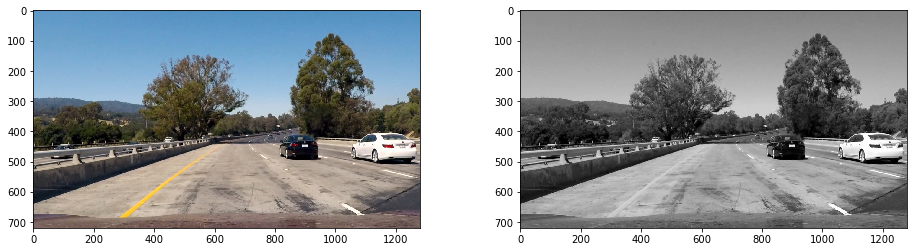

In [15]:
# read test1 image and convert to gray
test1 = mpimg.imread('./test_images/test1.jpg')
gray = cv2.cvtColor(test1, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(16,4))
plt.subplot(121)
plt.imshow(test1)
plt.subplot(122)
plt.imshow(gray, cmap='gray')
plt.show()
plt.close()

/home/wphw/anaconda3/envs/py3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


The shape of 2x2 cell size: (49, 79, 2, 2, 9)
The shape of 8x8 cell size: (11, 19, 2, 2, 9)
The shape of 16x16 cell size: (5, 9, 2, 2, 9)


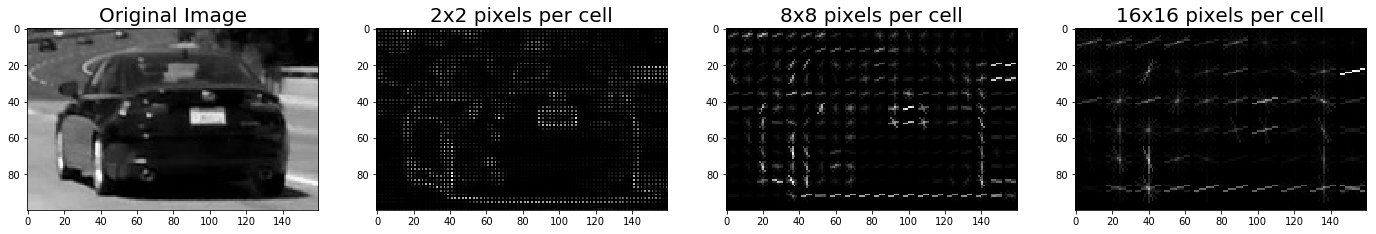

In [45]:
# cropout and investigate the car for various pixel numbers in cells
car = gray[400:500,800:960]

pix_per_cell_list = [
    (2, 2),
    (8, 8),
    (16, 16)
]

plt.figure(figsize=(24,8))
plt.subplot(1,4,1)
plt.imshow(car, cmap='gray')
plt.title('Original Image', fontsize=20)
i = 2
for pix_per_cell in pix_per_cell_list:
    features, hog_img = get_hog(car, pix_per_cell=pix_per_cell)
    print('The shape of ' + str(pix_per_cell[0]) 
        + 'x' + str(pix_per_cell[1]) + ' cell size: '
        + str(features.shape))
    plt.subplot(1,4,i)
    plt.imshow(hog_img, cmap='gray')
    plt.title(
        str(pix_per_cell[0]) + 'x' 
        + str(pix_per_cell[1]) + ' pixels per cell',
        fontsize=20)
    i += 1
plt.show()
plt.close()

## Feature normalization

In [ ]:
# Define a normalization function
def normalize(data):
    """Normalize data to unit std with zero centering.
    
    Returns normalized data, standard deviation (std) and
    mean for later use.
    Args:
        data: numpy array.
    """
    norm = (data-data.mean()) / data.std()
    
    return norm, data.std(), data.mean()